# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_43_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:45] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,2,1.303475,0.320223,0.691620,-0.715220,0.269225,-0.053473,-0.916276,0.361488,1.341855,...,0.093131,0.798992,-0.733875,0.038262,0.433046,-0.558861,-0.318921,0.082476,0.361348,-1.581269
1,1,1.040682,0.433916,-0.177336,-0.800547,1.629002,-0.725473,-0.681308,0.043363,0.905286,...,-0.873726,0.304849,0.064908,-0.519554,-0.863431,0.066100,-0.439551,0.713993,-0.246427,-0.186777
2,2,-0.559200,0.636671,-0.067989,-1.036499,-0.306244,0.535286,0.646122,-0.509084,1.033889,...,-0.161364,0.682148,-0.973200,-0.753369,-0.353522,0.262463,-0.381236,-0.342806,0.985693,-0.042482
3,0,1.391767,0.104729,-0.063120,-1.088009,0.555148,-0.698760,-0.125830,-0.173680,0.955284,...,-0.880376,0.879043,0.222619,-0.724652,-0.580264,0.197510,0.039846,1.042282,-0.152176,-0.321515
4,1,1.621300,0.988073,-0.638373,-1.677556,0.288400,0.137920,-0.201170,0.558159,0.453544,...,-0.750800,-0.738778,1.238205,1.384416,-0.896759,-1.147495,0.979291,1.397885,1.220256,-0.773419


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    1.303475  0.320223  0.691620 -0.715220  0.269225 -0.053473 -0.916276   
1    1.040682  0.433916 -0.177336 -0.800547  1.629002 -0.725473 -0.681308   
2   -0.559200  0.636671 -0.067989 -1.036499 -0.306244  0.535286  0.646122   
3    1.391767  0.104729 -0.063120 -1.088009  0.555148 -0.698760 -0.125830   
4    1.621300  0.988073 -0.638373 -1.677556  0.288400  0.137920 -0.201170   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.312103  0.656807 -0.522374 -0.846966  0.896216 -0.312821 -0.150635   
177  0.234944 -0.094377  0.260074 -0.793957  0.243106 -0.228022  0.059169   
178  0.420867  0.195804 -0.247219 -0.115416  0.472313 -0.002184  0.153051   
179  0.508123  0.810161 -0.569704 -0.666671  1.194661 -0.734187  0.211813   
180 -0.029691 -0.012050  0.024318 -0.584142  0.235847 -0.015007  0.447715   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'random_state':[125],
              'n_estimators': [15, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 14, 16, 20, 30, 40, 50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 14, 16, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [15, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, min_samples_split=4, n_estimators=15,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5275862068965517


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.43243243243243246


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0  0]
 [ 0 25  0]
 [ 0  0 52]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        52

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  1  6]
 [ 2  0  4]
 [ 8  0  5]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 2 0 2 2 2 0 0 0 2 0 2 0 0 0 2 0 0 2 1 0 0 2 0 2 0 0 2 2 0 0 0 2 0 2 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        18
           1       0.00      0.00      0.00         6
           2       0.33      0.38      0.36        13

    accuracy                           0.43        37
   macro avg       0.29      0.33      0.31        37
weighted avg       0.37      0.43      0.40        37



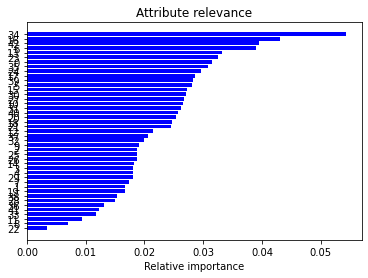

0 = 0.03141796641266779
1 = 0.016718927196787327
2 = 0.01874021245057725
3 = 0.01811308354161362
4 = 0.01805969956546427
5 = 0.028097823637534127
6 = 0.03889007792175533
7 = 0.017302239134834797
8 = 0.007006811546973288
9 = 0.01902364501139318
10 = 0.02661684856711896
11 = 0.009417203077357423
12 = 0.021431730303682468
13 = 0.033160635061266173
14 = 0.018267902391807197
15 = 0.027195009196220084
16 = 0.042981957426659015
17 = 0.028665876777578616
18 = 0.024668187065385944
19 = 0.016679625856686232
20 = 0.02532917930525276
21 = 0.024510818031647463
22 = 0.0034373387252228656
23 = 0.03252594317272151
24 = 0.029587699595271976
25 = 0.018679750482999528
26 = 0.018648051616012296
27 = 0.02671312583813653
28 = 0.01506575241138123
29 = 0.018016519191472735
30 = 0.0270737181082582
31 = 0.02622223093146747
32 = 0.01993321996576207
33 = 0.011708404778708142
34 = 0.05425215475561405
35 = 0.030850489928647272
36 = 0.013180244274078769
37 = 0.02065872395606084
38 = 0.01539967285349295
39 = 0.028224

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.